# Lista 5 - Marcin Fedorowicz 266852
#### Opis Zbioru Danych Jester Dataset 1

**Źródło danych:** [Eigentaste](https://eigentaste.berkeley.edu/dataset/)

##### Dane Żartów:
- **Nazwa pliku:** `jester_dataset_1_joke_texts.zip` (92KB)
- **Opis:** Zbiór zawiera teksty żartów ocenianych przez użytkowników.

##### Dane Oceny:
- **Nazwy plików:**
  - `jester_dataset_1_1.zip` (3.9MB)
  - `jester_dataset_1_2.zip` (3.6MB)
  - `jester_dataset_1_3.zip` (2.1MB)
- **Opis:** Dane zawierają oceny żartów wystawiane przez użytkowników w skali od -10 do 10. 
    - W zestawie pierwszym znajduje się 24983 użytkowników, którzy ocenili 36 lub więcej żartów.
    - W zestawie drugim znajduje się 23500 użytkowników, którzy ocenili 36 lub więcej żartów.
    - W zestawie trzecim znajduje się 24,983 użytkowników, którzy ocenili między 15 a 35 żartów.
- **Struktura danych:**
  - Pierwsza kolumna zawiera liczbę żartów ocenianych przez danego użytkownika.
  - Kolejne kolumny zawierają oceny poszczególnych żartów.
  - Wartości 99 oznaczają brak oceny.

# Przygotowanie danych

## Treści dowcipów
W pierwszej kolejności, po pobraniu odpowiednich plików, konieczne jest ich odpowiednie przetworzenie. W tym celu zostanie wykorzystana biblioteka BeautifulSoup, która umożliwi przetworzenie plików HTML na pliki tekstowe.

In [58]:
import os
from bs4 import BeautifulSoup
import pandas as pd

# Ścieżka do folderu z plikami HTML
file_path = 'Jester/Dowcipy'

# Lista do przechowywania danych o żartach
jokes_list = []

for joke_file in os.listdir(file_path):
    path = os.path.join(file_path, joke_file)

    # Wczytywanie zawartości pliku HTML
    with open(path, 'r', encoding='utf-8') as file:
        html_content = file.read()

    # Parsowanie HTML
    soup = BeautifulSoup(html_content, 'html.parser')

    # Usunięcie tagu title, jeśli istnieje
    if soup.title:
        soup.title.decompose()

    # Ekstrakcja tekstu z HTML, usuwanie białych znaków, enterów i powrotów karetki
    text = soup.get_text().strip().replace('\n', ' ').replace('\r', ' ').replace('\t', ' ')

    # Dodanie żartu do listy jako słownik
    jokes_list.append({'filename': joke_file, 'text': text})

# Tworzenie DataFrame z listy żartów
jokes_df = pd.DataFrame(jokes_list)

# Ekstrakcja numerów z nazw plików i przekształcenie ich na int
jokes_df['number'] = jokes_df['filename'].str.extract('(\d+)').astype(int)

# Usunięcie kolumny z nazwami plików
jokes_df = jokes_df.drop(columns=['filename'])

# Sortowanie DataFrame po numerze żartu
jokes_df = jokes_df.sort_values('number')

# Wyświetlenie numeru i tekstu żartów
for index, row in jokes_df.iterrows():
    print(f"{row['number']}: {row['text']}")

1: A man visits the doctor. The doctor says "I have bad news for you.You have cancer and Alzheimer's disease".  The man replies "Well,thank God I don't have cancer!"
2: This couple had an excellent relationship going until one day he came home from work to find his girlfriend packing. He asked her why she was leaving him and she told him that she had heard awful things about him.   "What could they possibly have said to make you move out?"   "They told me that you were a pedophile."   He replied, "That's an awfully big word for a ten year old."
3: Q. What's 200 feet long and has 4 teeth?   A. The front row at a Willie Nelson Concert.
4: Q. What's the difference between a man and a toilet?   A. A toilet doesn't follow you around after you use it.
5: Q. What's O. J. Simpson's Internet address?  A. Slash, slash, backslash, slash, slash, escape.
6: Bill & Hillary are on a trip back to Arkansas. They're almost out of gas, so Bill pulls into a service station on the outskirts of town. The at

## Oceny użytkowników
### Połączenie zbiorów danych z ocenami
Na stronie zawierającej zbiór danych Jester dostępne są trzy różne wersje zbioru. Z uwagi na brak jednoznacznych informacji dotyczących odpowiedniego wyboru wersji, podjęto decyzję o wykorzystaniu wszystkich trzech zbiorów do analizy. W procesie przetwarzania danych zastosowano bibliotekę pandas do połączenia wszystkich plików w jeden zintegrowany DataFrame. Następnie usunięto pierwszą kolumnę, która zawierała informacje o liczbie ocenionych żartów. Dodatkowo wartości 99, reprezentujące brak oceny, zastąpiono wartościami NaN, aby ujednolicić i ułatwić dalsze przetwarzanie danych.

In [55]:
import numpy as np

# Ścieżka do folderu z plikami do połączenia
folder_path = 'Jester/Oceny'

# Pobieranie listy plików w folderze
files = [f for f in os.listdir(folder_path) if f.endswith('.xlsx') or f.endswith('.xls')]

# Tworzenie nazw kolumn
columns = ['Number_of_jokes_rated'] + [i for i in range(1, 101)]

# Inicjalizacja zmiennej na połączony DataFrame
df_combined = None

for file in files:
    # Tworzenie pełnej ścieżki do pliku
    file_path = os.path.join(folder_path, file)
    # Odczytywanie pliku Excela do DataFrame bez nagłówków
    df = pd.read_excel(file_path, header=None)
    # Przypisywanie nazw kolumn do DataFrame
    df.columns = columns
    # Sprawdzanie, czy df_combined jest pusty
    if df_combined is None:
        df_combined = df
    else:
        # Dodawanie DataFrame do połączonego DataFrame
        df_combined = pd.concat([df_combined, df], ignore_index=True)

# Usuwanie pierwszej kolumny
df_combined = df_combined.drop(columns=['Number_of_jokes_rated'])

# Zamiana wartości 99 na NaN
df_combined = df_combined.replace(99, np.nan)

# Wypisanie liczby ocen dla każdej kolumny
for column in df_combined.columns:
    # Uzyskanie liczby niepustych wartości (tj. faktycznych ocen)
    count_of_ratings = df_combined[column].notnull().sum()
    print(f"{column}: {count_of_ratings}")

1: 32024
2: 35277
3: 32402
4: 30512
5: 73405
6: 39599
7: 73401
8: 73411
9: 30741
10: 39352
11: 42677
12: 43564
13: 73405
14: 43899
15: 73406
16: 73399
17: 73413
18: 73404
19: 73406
20: 73410
21: 57706
22: 41818
23: 38855
24: 31084
25: 40451
26: 48620
27: 67718
28: 49482
29: 67065
30: 35021
31: 55597
32: 66300
33: 32516
34: 42770
35: 66460
36: 68137
37: 34822
38: 46881
39: 47508
40: 45801
41: 38492
42: 54082
43: 36068
44: 33652
45: 43368
46: 48981
47: 45530
48: 53839
49: 60608
50: 70449
51: 38609
52: 40748
53: 67068
54: 55515
55: 40363
56: 54502
57: 33056
58: 32385
59: 37180
60: 36730
61: 55679
62: 63574
63: 41044
64: 35717
65: 59123
66: 60482
67: 36143
68: 60539
69: 60068
70: 41585
71: 18505
72: 18968
73: 18764
74: 19024
75: 19045
76: 19369
77: 19505
78: 19430
79: 19623
80: 19498
81: 19904
82: 19754
83: 20118
84: 20096
85: 20364
86: 20552
87: 20283
88: 20734
89: 20443
90: 20937
91: 20934
92: 21214
93: 21506
94: 21792
95: 21991
96: 22163
97: 22556
98: 22708
99: 23188
100: 19494


### Uśrednienie ocen
W celu jednoznacznego ocenienia żartów, konieczne jest uśrednienie ocen wystawionych przez użytkowników. W tym celu zastosowano funkcję median() z biblioteki pandas, umożliwiającą obliczenie mediany dla każdego żartu. Wybór mediany jako miary centralnej podyktowany był jej większą odpornością na wartości odstające w porównaniu do średniej arytmetycznej.

In [56]:
# Obliczanie mediany dla każdej kolumny
median_df = df_combined.median()

# Resetowanie indeksu, aby numer kolumny stał się kolumną DataFrame
median_df = median_df.reset_index()

# Zmiana nazw kolumn
median_df.columns = ['Number', 'Median']

# Wyświetlanie wyniku
print(median_df)

# Wyświetlenie najlepszej i najgorszej mediany ocen
best_joke = median_df.loc[median_df['Median'].idxmax()]
worst_joke = median_df.loc[median_df['Median'].idxmin()]
print(f"Najlepszy żart: {best_joke['Median']}"
      f"\nNajgorszy żart: {worst_joke['Median']}")

    Number  Median
0        1    1.60
1        2    0.73
2        3    0.68
3        4   -1.41
4        5    0.92
..     ...     ...
95      96    1.99
96      97    2.23
97      98    1.50
98      99    0.34
99     100    1.84

[100 rows x 2 columns]
Najlepszy żart: 4.56
Najgorszy żart: -4.85


### Połączenie danych o żartach i ocenach
W celu ułatwienia analizy, dane dotyczące żartów zostały połączone z uśrednionymi ocenami za pomocą funkcji merge z biblioteki pandas. Proces ten polegał na scaleniu dwóch zbiorów danych na podstawie numeru żartu, co umożliwiło integrację tekstu żartów z odpowiadającymi im medianami ocen. Po zakończeniu procesu scalania, w celu weryfikacji poprawności przeprowadzonych operacji, wyświetlono pierwsze kilka wierszy z połączonego zbioru danych.

In [59]:
# Łączenie DataFrame z żartami i medianami ocen
merged_df = jokes_df.merge(median_df, left_on='number', right_on='Number')

# Usunięcie kolumny z numerem żartu
merged_df = merged_df.drop(columns=['Number'])
merged_df = merged_df.drop(columns=['number'])

# Wyświetlenie kilku pierwszych wierszy połączonego DataFrame
print(merged_df.head())

                                                text  Median
0  A man visits the doctor. The doctor says "I ha...    1.60
1  This couple had an excellent relationship goin...    0.73
2  Q. What's 200 feet long and has 4 teeth?   A. ...    0.68
3  Q. What's the difference between a man and a t...   -1.41
4  Q. What's O. J. Simpson's Internet address?  A...    0.92


# Ekstrakcja cech
## Wymagane importy

In [23]:
# Instalacja Sentence Transformers
!pip install sentence_transformers

In [25]:
# Instalacja FastText
!pip install fasttext-wheel

  Using cached pybind11-2.12.0-py3-none-any.whl.metadata (9.5 kB)
   ---------------------------------------- 0.0/241.5 kB ? eta -:--:--
   ------ -------------------------------- 41.0/241.5 kB 991.0 kB/s eta 0:00:01
   ----------------------- ---------------- 143.4/241.5 kB 1.7 MB/s eta 0:00:01
   ---------------------------------------- 241.5/241.5 kB 1.9 MB/s eta 0:00:00
Using cached pybind11-2.12.0-py3-none-any.whl (234 kB)


In [26]:
from sentence_transformers import SentenceTransformer
import fasttext.util
import requests
import gzip
import shutil

# URL do modelu FastText
url = 'https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.en.300.bin.gz'

# Pobieranie pliku
r = requests.get(url)
with open('cc.en.300.bin.gz', 'wb') as f:
    f.write(r.content)

# Rozpakowanie pliku
with gzip.open('cc.en.300.bin.gz', 'rb') as f_in:
    with open('cc.en.300.bin', 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

## Obliczanie osadzeń

In [60]:
# Wczytywanie modelu Sentence Transformers i FastText
model_s = SentenceTransformer('bert-base-cased')
model_f = fasttext.load_model('cc.en.300.bin')

# Obliczanie osadzeń dla tekstu żartów
jokes_embeddings_s = model_s.encode(merged_df['text'].values, show_progress_bar=True)
jokes_embeddings_f = np.array([model_f.get_sentence_vector(text) for text in merged_df['text'].values])

# Wyświetlenie wymiarów macierzy z osadzeniami
print("Osadzenia Sentence Transformers:", jokes_embeddings_s.shape)
print("Osadzenia FastText:", jokes_embeddings_f.shape)

No sentence-transformers model found with name bert-base-cased. Creating a new one with mean pooling.
C:\Users\izaim\Desktop\Studia\SI\si_l5\venv\lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Batches:   0%|          | 0/4 [00:00<?, ?it/s]

Osadzenia Sentence Transformers: (100, 768)
Osadzenia FastText: (100, 300)


# Podział danych na zbiór treningowy i testowy

In [61]:
from sklearn.model_selection import train_test_split

X_s = jokes_embeddings_s
X_f = jokes_embeddings_f
Y = merged_df['Median'].values

# Podział danych na zbiór treningowy i testowy
X_s_train, X_s_test, Y_s_train, Y_s_test = train_test_split(X_s, Y, test_size=0.2, random_state=42)
X_f_train, X_f_test, Y_f_train, Y_f_test = train_test_split(X_f, Y, test_size=0.2, random_state=42)

# Wyświetlenie wymiarów zbiorów treningowych i testowych
print("Osadzenia Sentence Transformers:")
print("X_train:", X_s_train.shape, "Y_train:", Y_s_train.shape)
print("X_test:", X_s_test.shape, "Y_test:", Y_s_test.shape)
print("\nOsadzenia FastText:")
print("X_train:", X_f_train.shape, "Y_train:", Y_f_train.shape)
print("X_test:", X_f_test.shape, "Y_test:", Y_f_test.shape)

Osadzenia Sentence Transformers:
X_train: (80, 768) Y_train: (80,)
X_test: (20, 768) Y_test: (20,)

Osadzenia FastText:
X_train: (80, 300) Y_train: (80,)
X_test: (20, 300) Y_test: (20,)


# Testowanie działania podstawowego modelu MLP

In [62]:
from sklearn.metrics import mean_squared_error

def test_regression(regr, X_train, y_train, X_test, y_test, epochs=1000):
    train_errors = []
    test_errors = []

    for _ in range(epochs):
        regr.partial_fit(X_train, y_train)
        train_errors.append(mean_squared_error(y_train, regr.predict(X_train)))
        test_errors.append(mean_squared_error(y_test, regr.predict(X_test)))

    return train_errors, test_errors

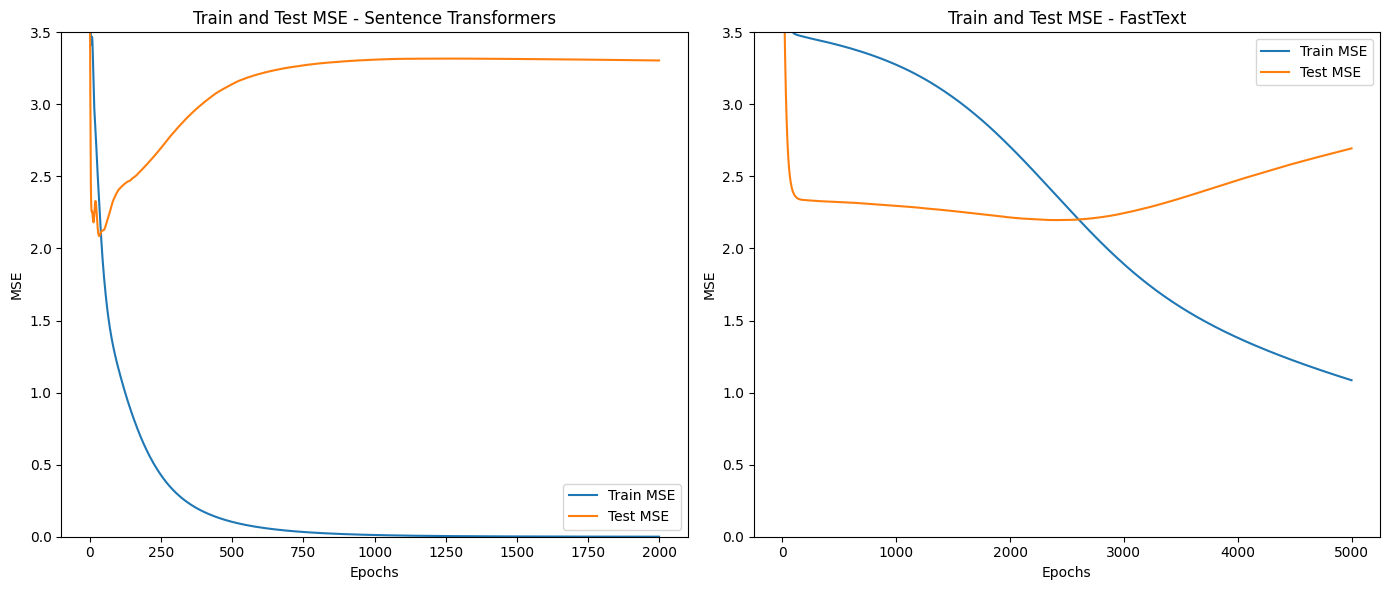

In [63]:
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt

regr_s = MLPRegressor(solver='sgd', alpha=0.0, learning_rate='constant')
regr_f = MLPRegressor(solver='sgd', alpha=0.0, learning_rate='constant')
train_errors, test_errors = test_regression(regr_s, X_s_train, Y_s_train, X_s_test, Y_s_test, epochs=2000)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(train_errors, label='Train MSE')
plt.plot(test_errors, label='Test MSE')
plt.title('Train and Test MSE - Sentence Transformers')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.ylim(0, 3.5)
plt.legend()

train_errors, test_errors = test_regression(regr_f, X_f_train, Y_f_train, X_f_test, Y_f_test, epochs=5000)

plt.subplot(1, 2, 2)
plt.plot(train_errors, label='Train MSE')
plt.plot(test_errors, label='Test MSE')
plt.title('Train and Test MSE - FastText')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.ylim(0, 3.5)
plt.legend()

plt.tight_layout()
plt.show()

### Wnioski
Zdecydowanie najszybciej uczył się model wykorzystujący osadzenia Sentence Transformers. Po około 70 epokach osiągnął on najniższy błąd na zbiorze testowym. Model wykorzystujący osadzenia FastText osiągnął odrobinę gorsze wyniki, jednak wymagał więcej epok do osiągnięcia podobnego błędu. W przypadku osadzenia Sentence Transformers błąd na zbiorze testowym zaczął rosnąć po około 100 epokach, wynikać to może z przeuczenia modelu. Dla osadzenia Fast Text błąd na zbiorze testowym zaczął rosnąć po około 2500 epokach, co również może wskazywać na przeuczenie modelu. Ostatecznie, model wykorzystujący osadzenia Sentence Transformers osiągnął lepsze wyniki w krótszym czasie, co sugeruje, że jest on bardziej efektywny w uczeniu się na tych danych.

# Badanie wpływu tempa uczenia na działanie modelu

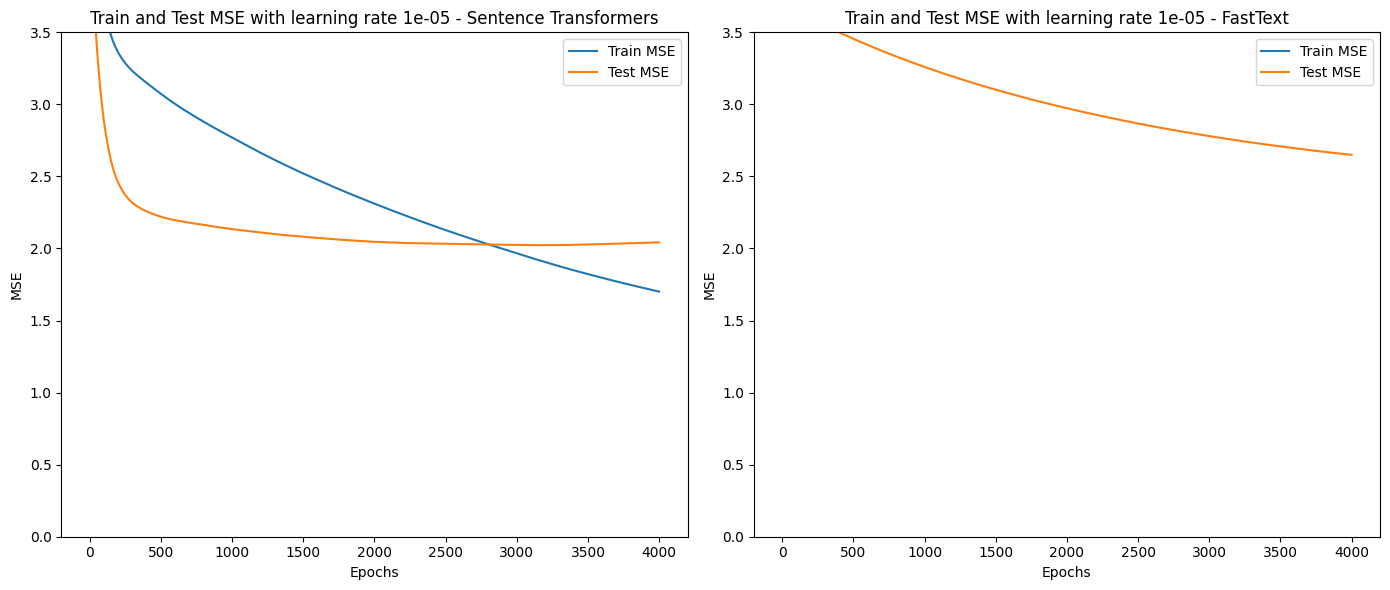

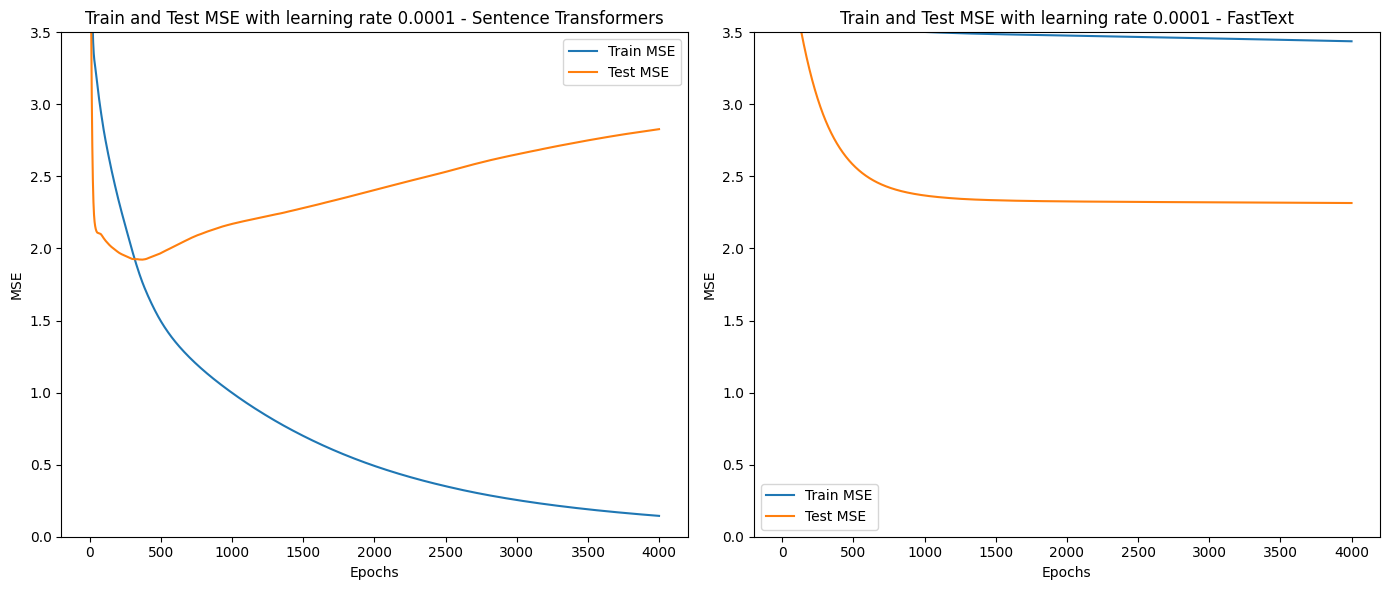

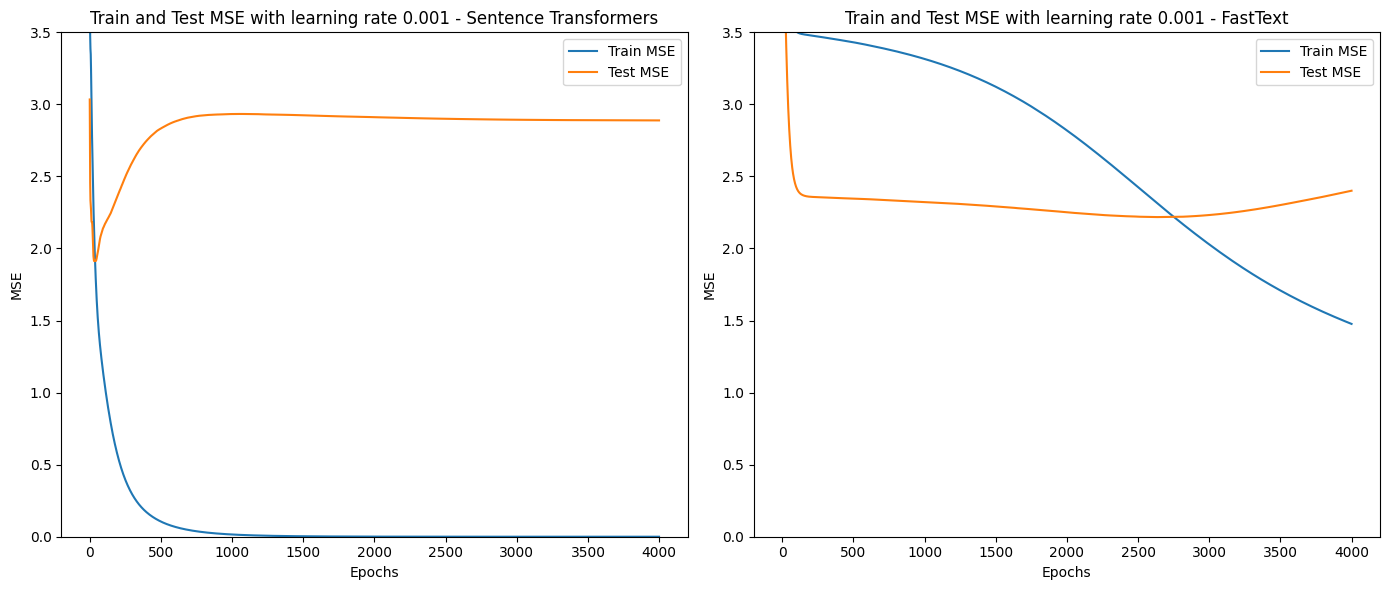

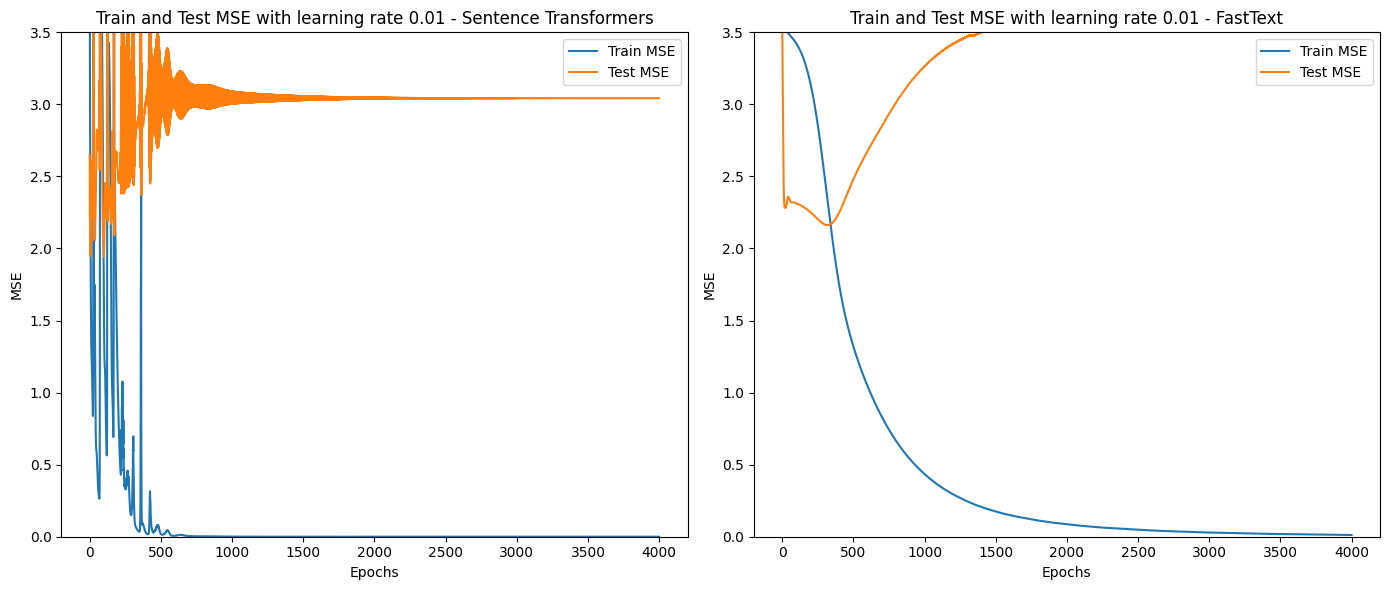

In [66]:
learning_rates = [0.00001, 0.0001, 0.001, 0.01]

train_errors_all_s = []
test_errors_all_s = []
train_errors_all_f = []
test_errors_all_f = []

for learning_rate in learning_rates:
    regr = MLPRegressor(solver='sgd', alpha=0.0, learning_rate='constant', learning_rate_init=learning_rate)
    train_errors, test_errors = test_regression(regr, X_s_train, Y_s_train, X_s_test, Y_s_test, epochs=4000)
    train_errors_all_s.append(train_errors)
    test_errors_all_s.append(test_errors)
    
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    plt.plot(train_errors, label='Train MSE')
    plt.plot(test_errors, label='Test MSE')
    plt.title(f'Train and Test MSE with learning rate {learning_rate} - Sentence Transformers')
    plt.xlabel('Epochs')
    plt.ylabel('MSE')
    plt.ylim(0, 3.5)
    plt.legend()
    
    regr = MLPRegressor(solver='sgd', alpha=0.0, learning_rate='constant', learning_rate_init=learning_rate)
    train_errors, test_errors = test_regression(regr, X_f_train, Y_f_train, X_f_test, Y_f_test, epochs=4000)
    train_errors_all_f.append(train_errors)
    test_errors_all_f.append(test_errors)
    
    plt.subplot(1, 2, 2)
    plt.plot(train_errors, label='Train MSE')
    plt.plot(test_errors, label='Test MSE')
    plt.title(f'Train and Test MSE with learning rate {learning_rate} - FastText')
    plt.xlabel('Epochs')
    plt.ylabel('MSE')
    plt.ylim(0, 3.5)
    plt.legend()
   
    plt.tight_layout()
    plt.show()

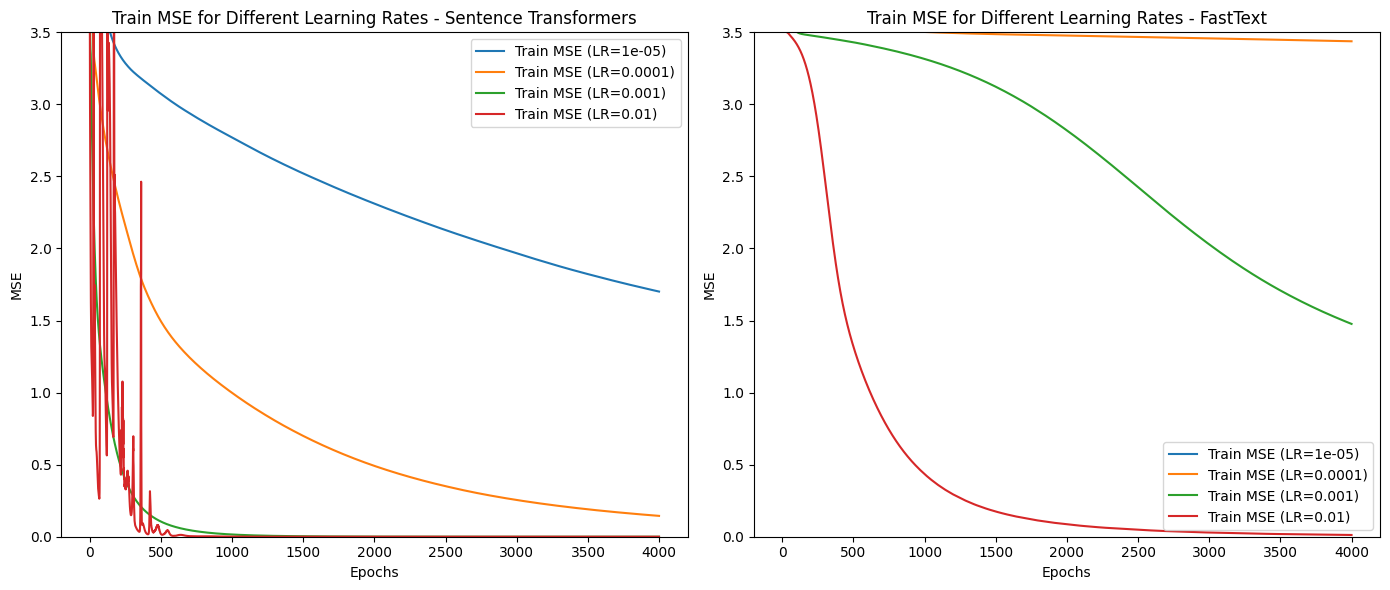

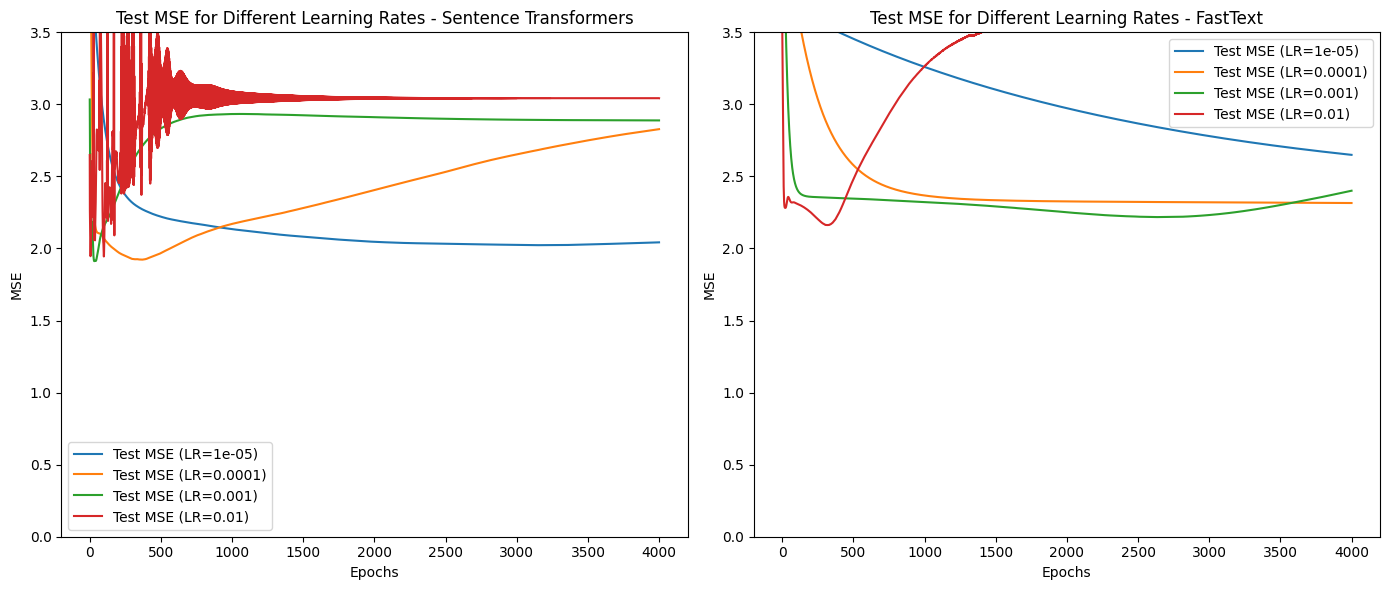

In [67]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1) 
for i, learning_rate in enumerate(learning_rates):
    plt.plot(train_errors_all_s[i], label=f'Train MSE (LR={learning_rate})')
plt.title('Train MSE for Different Learning Rates - Sentence Transformers')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.ylim(0, 3.5)
plt.legend()

plt.subplot(1, 2, 2) 
for i, learning_rate in enumerate(learning_rates):
    plt.plot(train_errors_all_f[i], label=f'Train MSE (LR={learning_rate})')
plt.title('Train MSE for Different Learning Rates - FastText')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.ylim(0, 3.5)
plt.legend()

plt.tight_layout()
plt.show() 


plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
for i, learning_rate in enumerate(learning_rates):
    plt.plot(test_errors_all_s[i], label=f'Test MSE (LR={learning_rate})')
plt.title('Test MSE for Different Learning Rates - Sentence Transformers')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.ylim(0, 3.5)
plt.legend()

plt.subplot(1, 2, 2)
for i, learning_rate in enumerate(learning_rates):
    plt.plot(test_errors_all_f[i], label=f'Test MSE (LR={learning_rate})')
plt.title('Test MSE for Different Learning Rates - FastText')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.ylim(0, 3.5)
plt.legend()

plt.tight_layout() 
plt.show()

### Wnioski
- **Niskie tempo uczenia (LR=0.00001)**: Zaobserwowano, że przy niskim tempie uczenia model ewoluuje bardzo wolno, co objawia się wysokim błędem MSE na początkowych etapach procesu uczenia. Jest to szczególnie zauważalne w przypadku transformatorów zdaniowych (Sentence Transformers), gdzie błąd treningowy maleje powoli, sugerując niewystarczającą konwergencję w analizowanym zakresie epok.
  
- **Wysokie tempo uczenia (LR=0.01)**: Przy wyższym tempie uczenia model szybko redukuje MSE na zbiorze treningowym. Jednakże, błąd na zbiorze testowym pozostaje względnie wysoki lub rośnie, co wskazuje na zjawisko przeuczenia (overfitting). Jest to szczególnie widoczne w modelach FastText, gdzie MSE testowe szybko stabilizuje się na wysokim poziomie.

- **Optymalne tempo uczenia (LR=0.001)**: Ustalono, że tempo uczenia równe 0.001 oferuje najlepszą równowagę między szybkością uczenia a minimalizacją ryzyka przeuczenia. Błąd MSE dla zarówno zbioru treningowego, jak i testowego maleje w sposób stabilny, osiągając najniższe wartości dla obu przypadków, co wskazuje na skuteczną generalizację modelu.

- **Analiza przeuczenia**: Przeuczenie jest szczególnie zauważalne przy wyższych wartościach tempa uczenia (LR=0.01), gdzie obserwuje się znacznie niższy błąd MSE na zbiorze treningowym w porównaniu do zbioru testowego. Jest to wskaźnik nadmiernego dopasowania się modelu do danych treningowych, co skutkuje obniżeniem jego zdolności do generalizacji na nieznane dane.


# Badanie wpływu rozmiaru modelu MLP na jakość działania

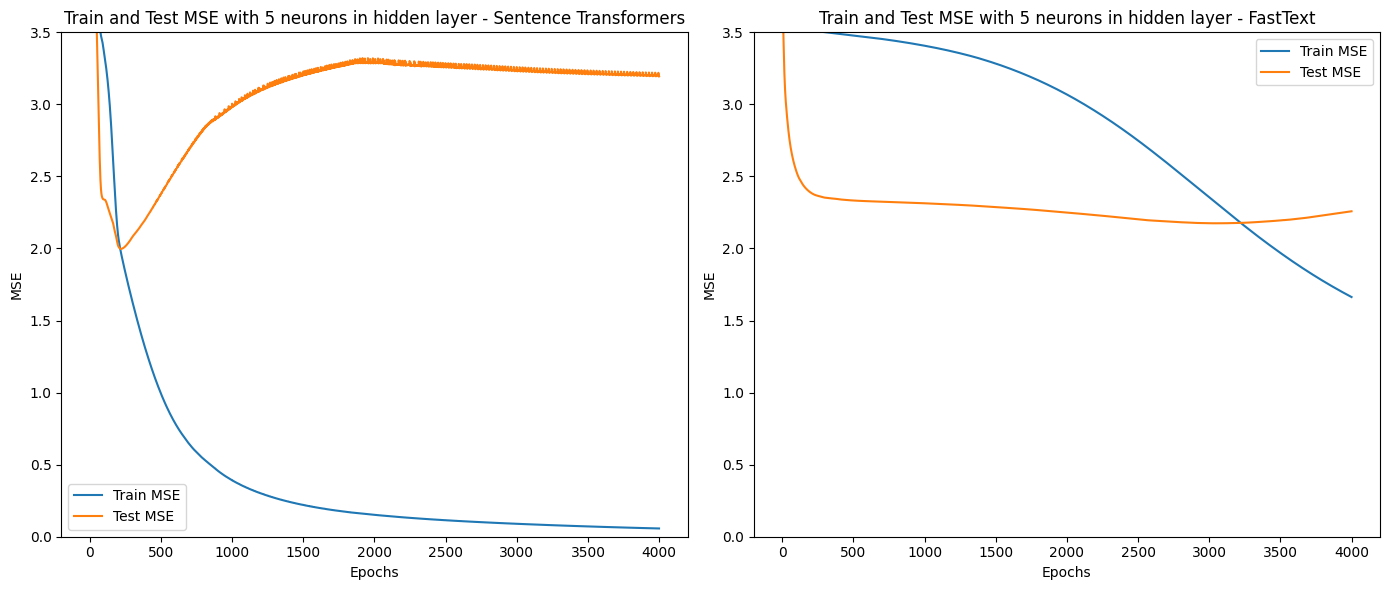

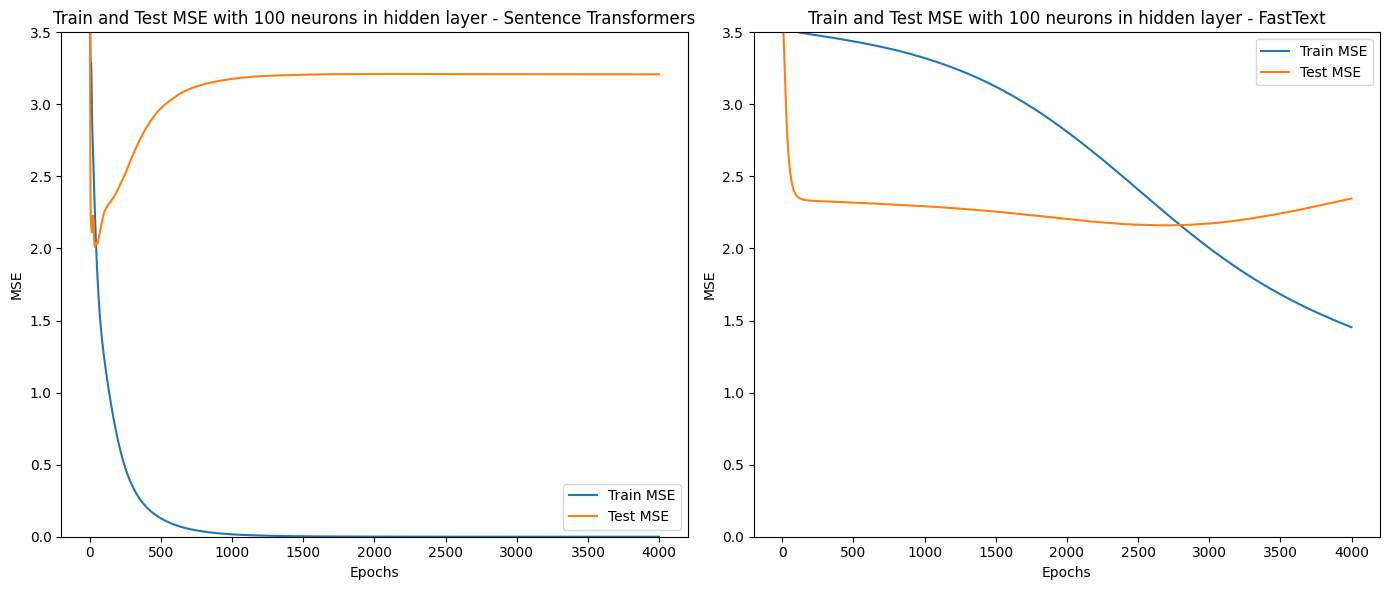

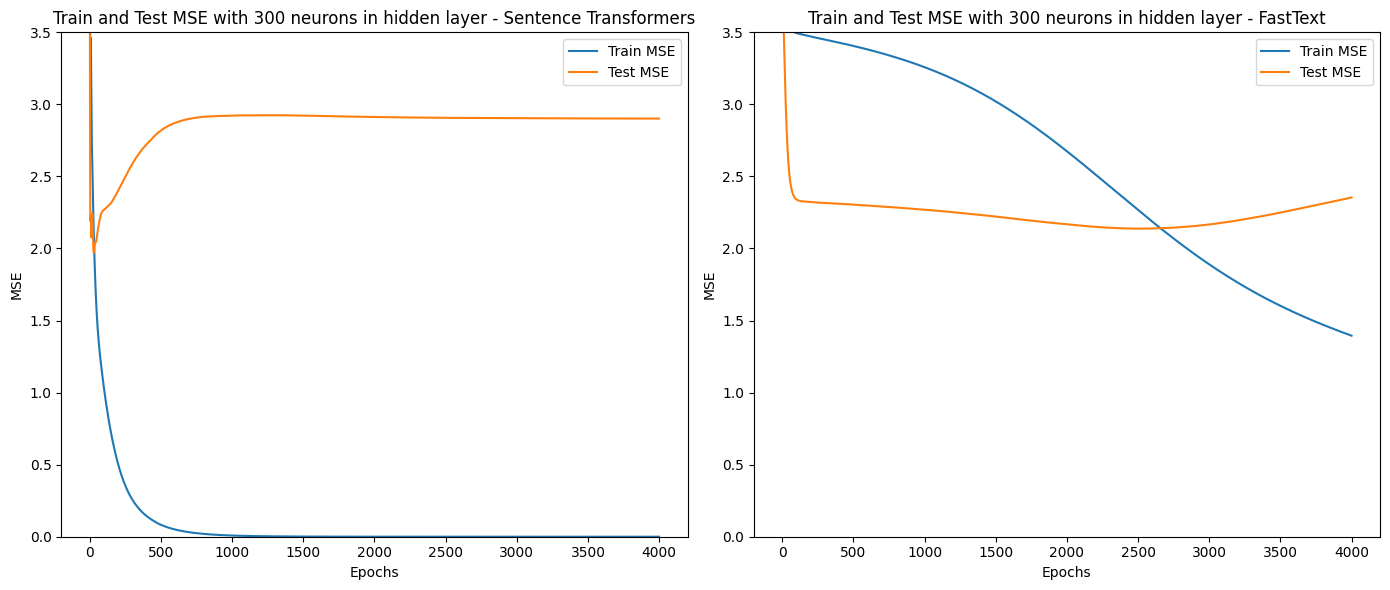

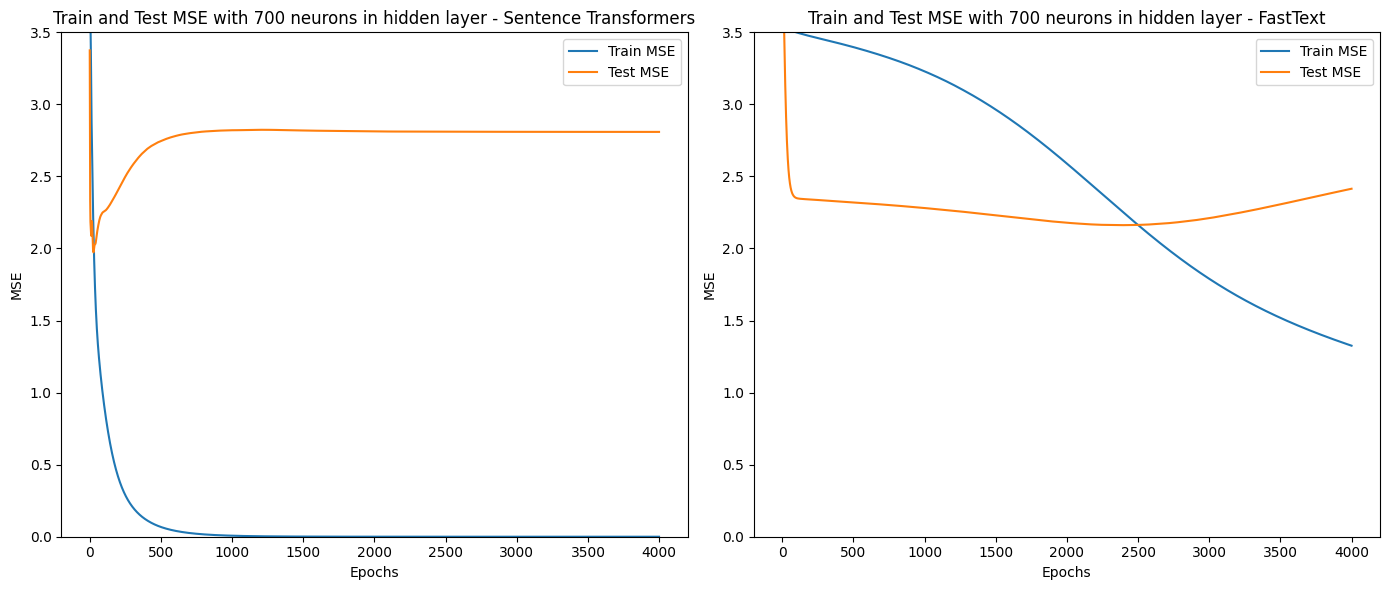

In [71]:
hidden_layer_sizes = [5, 100, 300, 700]

train_errors_all_s = []
test_errors_all_s = []
train_errors_all_f = []
test_errors_all_f = []

for size in hidden_layer_sizes:
    regr = MLPRegressor(solver='sgd', alpha=0.0, learning_rate='constant', hidden_layer_sizes=(size,))
    train_errors, test_errors = test_regression(regr, X_s_train, Y_s_train, X_s_test, Y_s_test, epochs=4000)
    train_errors_all_s.append(train_errors)
    test_errors_all_s.append(test_errors)
    
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    plt.plot(train_errors, label='Train MSE')
    plt.plot(test_errors, label='Test MSE')
    plt.title(f'Train and Test MSE with {size} neurons in hidden layer - Sentence Transformers')
    plt.xlabel('Epochs')
    plt.ylabel('MSE')
    plt.ylim(0, 3.5)
    plt.legend()
    
    regr = MLPRegressor(solver='sgd', alpha=0.0, learning_rate='constant', hidden_layer_sizes=(size,))
    train_errors, test_errors = test_regression(regr, X_f_train, Y_f_train, X_f_test, Y_f_test, epochs=4000)
    train_errors_all_f.append(train_errors)
    test_errors_all_f.append(test_errors)

    plt.subplot(1, 2, 2)
    plt.plot(train_errors, label='Train MSE')
    plt.plot(test_errors, label='Test MSE')
    plt.title(f'Train and Test MSE with {size} neurons in hidden layer - FastText')
    plt.xlabel('Epochs')
    plt.ylabel('MSE')
    plt.ylim(0, 3.5)
    plt.legend()
    
    plt.tight_layout()
    plt.show()

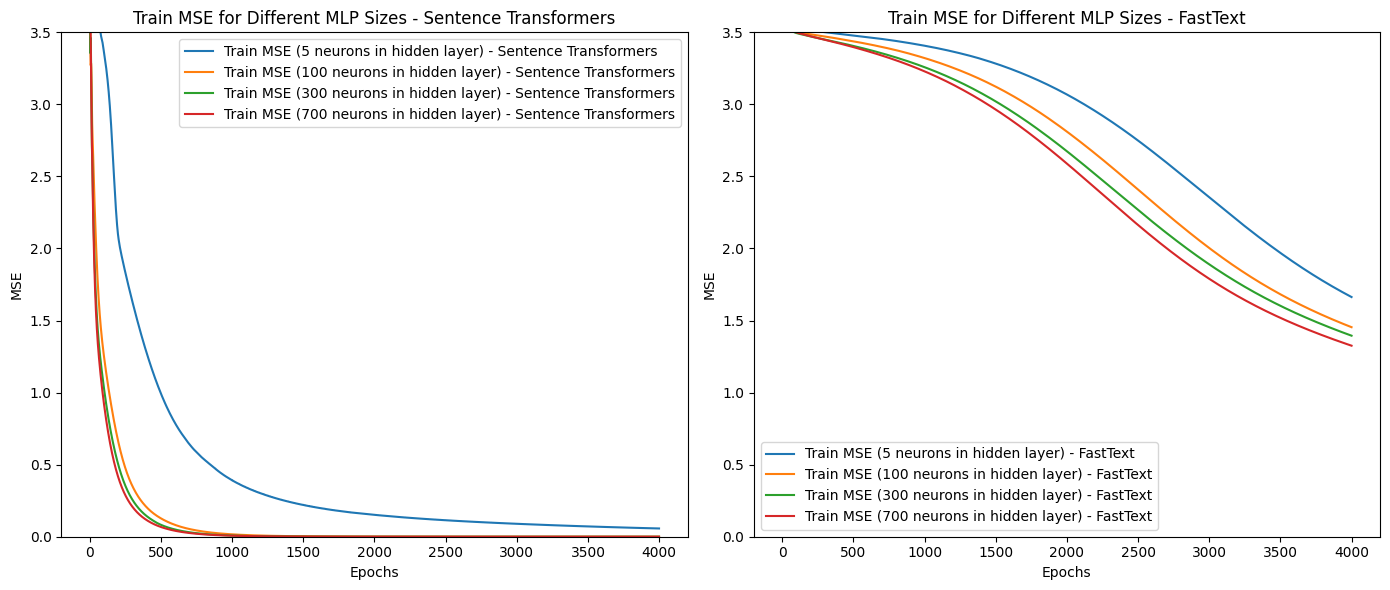

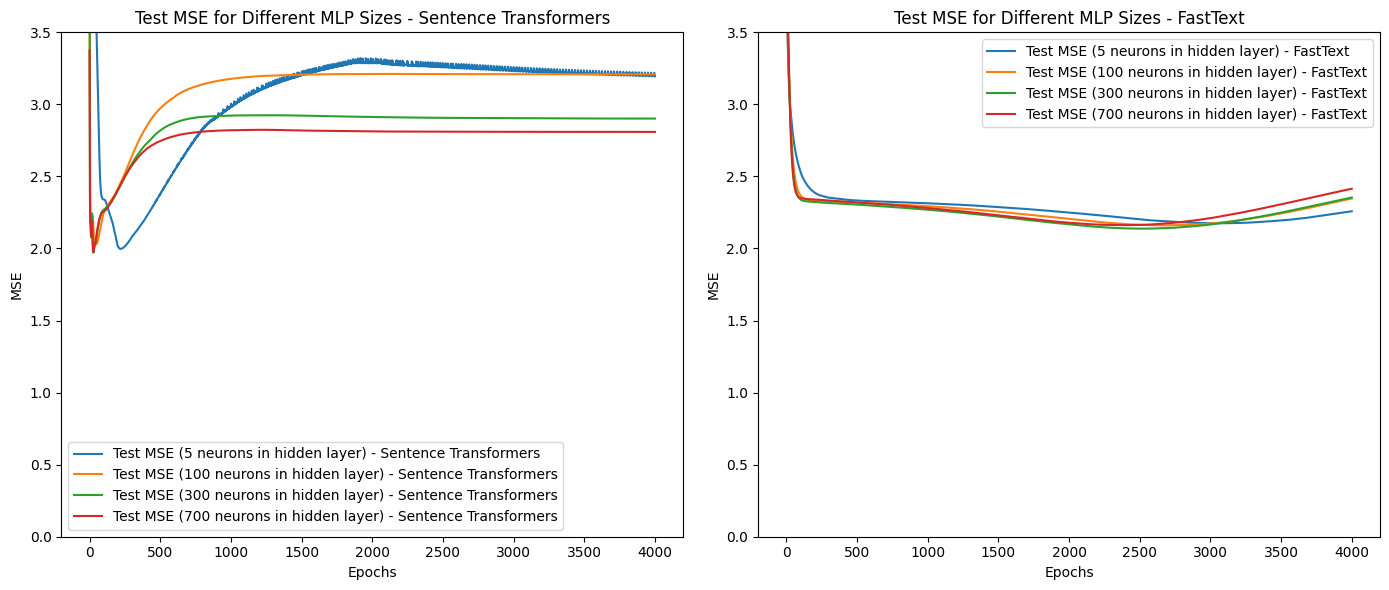

In [72]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
for i, size in enumerate(hidden_layer_sizes):
    plt.plot(train_errors_all_s[i], label=f'Train MSE ({size} neurons in hidden layer) - Sentence Transformers')

plt.title('Train MSE for Different MLP Sizes - Sentence Transformers')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.ylim(0, 3.5)
plt.legend()

plt.subplot(1, 2, 2)
for i, size in enumerate(hidden_layer_sizes):
    plt.plot(train_errors_all_f[i], label=f'Train MSE ({size} neurons in hidden layer) - FastText')

plt.title('Train MSE for Different MLP Sizes - FastText')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.ylim(0, 3.5)
plt.legend()

plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
for i, size in enumerate(hidden_layer_sizes):
    plt.plot(test_errors_all_s[i], label=f'Test MSE ({size} neurons in hidden layer) - Sentence Transformers')

plt.title('Test MSE for Different MLP Sizes - Sentence Transformers')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.ylim(0, 3.5)
plt.legend()

plt.subplot(1, 2, 2)
for i, size in enumerate(hidden_layer_sizes):
    plt.plot(test_errors_all_f[i], label=f'Test MSE ({size} neurons in hidden layer) - FastText')

plt.title('Test MSE for Different MLP Sizes - FastText')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.ylim(0, 3.5)
plt.legend()

plt.tight_layout()
plt.show()

### Wnioski
##### Wpływ liczby neuronów w warstwie ukrytej na dopasowanie do danych treningowych

- **Dopasowanie do danych treningowych**: Niezależnie od wykorzystanych osadzeń (Sentence Transformers lub FastText), zwiększanie liczby neuronów w warstwie ukrytej (`hidden_layer_sizes`) prowadziło do lepszych wyników na zbiorze treningowym. Warto zauważyć, że różnice w błędzie treningowym były niewielkie między różnymi konfiguracjami warstwy ukrytej.

##### Wpływ liczby neuronów na błąd testowy

- **Zwiększenie liczby neuronów**: W obu modelach obserwowano wzrost błędu na zbiorze testowym przy zwiększaniu liczby neuronów, co sugeruje zjawisko przeuczenia. Jest to typowe, gdy model zbyt dokładnie dopasowuje się do danych treningowych, tracąc zdolność do generalizacji na nowe dane.

##### Optymalne konfiguracje dla różnych osadzeń

- **Sentence Transformers**: Model wykorzystujący osadzenia Sentence Transformers z 5 neuronami w warstwie ukrytej osiągnął najniższy błąd na zbiorze testowym, co wskazuje na skuteczność mniejszej liczby neuronów w kontekście tych danych.
  
- **FastText**: Dla modeli opartych na osadzeniach FastText, optymalne wyniki na zbiorze testowym uzyskano przy użyciu 300 neuronów w warstwie ukrytej, co pokazuje różnice w optymalnej architekturze sieci w zależności od rodzaju osadzeń.

##### Analiza przeuczenia

- **Rozmiar warstwy ukrytej a przeuczenie**: Zbyt duża liczba neuronów w warstwie ukrytej może prowadzić do przeuczenia, szczególnie jeśli model osiąga znacznie niższe błędy na zbiorze treningowym w porównaniu do zbioru testowego. Znalezienie optymalnej liczby neuronów jest kluczowe dla zachowania zdolności generalizacyjnych modelu.


# Testowanie modelu MLP na własnych danych

In [73]:
my_jokes = [
    "I'm reading a book on the history of glue. I just can't seem to put it down.",
    "Why don't scientists trust atoms? Because they make up everything!",
    "I told my wife she should embrace her mistakes. She gave me a hug.",
    "What do you call a magic dog? A Labracadabrador.",
    "Why did the yogurt go to the art exhibition? Because it was cultured.",
    "The five other polytechnic school freshmen following the same course as Einstein included just one woman, a twenty year old Serbian, Mileva Marić.",
    "Lorem Ipsum is simply dummy text of the printing and typesetting industry."
]

new_jokes_embeddings_s = model_s.encode(my_jokes, show_progress_bar=True)
new_jokes_embeddings_f = np.array([model_f.get_sentence_vector(text) for text in my_jokes])

regr_s = MLPRegressor(solver='sgd', alpha=0.0, learning_rate_init=0.001, hidden_layer_sizes=(300,), max_iter=2000)
regr_f = MLPRegressor(solver='sgd', alpha=0.0, learning_rate_init=0.01, hidden_layer_sizes=(300,), max_iter=2000)

regr_s.fit(X_s_train, Y_s_train)
regr_f.fit(X_f_train, Y_f_train)

predictions_s = regr_s.predict(new_jokes_embeddings_s)
predictions_f = regr_f.predict(new_jokes_embeddings_f)

for i, joke in enumerate(my_jokes):
    print(f"Joke: {joke}")
    print(f"Sentence Transformers Prediction: {predictions_s[i]}")
    print(f"FastText Prediction: {predictions_f[i]}\n")

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Joke: I'm reading a book on the history of glue. I just can't seem to put it down.
Sentence Transformers Prediction: -2.0063774585723877
FastText Prediction: 1.3218979835510254

Joke: Why don't scientists trust atoms? Because they make up everything!
Sentence Transformers Prediction: -1.011406421661377
FastText Prediction: 1.307422399520874

Joke: I told my wife she should embrace her mistakes. She gave me a hug.
Sentence Transformers Prediction: -0.49657878279685974
FastText Prediction: 1.325232982635498

Joke: What do you call a magic dog? A Labracadabrador.
Sentence Transformers Prediction: -2.9322423934936523
FastText Prediction: 1.2270413637161255

Joke: Why did the yogurt go to the art exhibition? Because it was cultured.
Sentence Transformers Prediction: -1.3642640113830566
FastText Prediction: 1.3219460248947144

Joke: The five other polytechnic school freshmen following the same course as Einstein included just one woman, a twenty year old Serbian, Mileva Marić.
Sentence Trans

## Podsumowanie
#### Różnice w ocenach
Modele wykorzystujące osadzenia Sentence Transformers i FastText wykazują znaczące różnice w ocenach tych samych tekstów:
- **Sentence Transformers** przypisują konsekwentnie negatywne wartości większości żartów, sugerując skłonność do oceny tekstów jako mniej śmiesznych.
- **FastText** systematycznie przyznaje dodatnie wartości, co wskazuje na pozytywną reakcję na te same teksty.

#### Oceny nietypowych tekstów
Szczególnie zaskakujące jest, że model FastText przyznaje wysokie oceny nawet tekstom, które nie są żartami, takim jak fragmenty Wikipedii czy Lorem Ipsum. To może sugerować ograniczenia modelu w rozróżnianiu treści humorystycznych od niemających na celu bawić.

#### Zgodność z subiektywnymi ocenami
W przypadku faktycznych żartów, oceny modelu FastText wydają się bardziej zgodne z subiektywnymi oczekiwaniami, co sugeruje większą skuteczność tego modelu w wykrywaniu elementów humorystycznych w tekstach w porównaniu do modelu Sentence Transformers.

#### Wyjątek w ocenie Sentence Transformers
Jedyny tekst, który model Sentence Transformers ocenił jako lekko śmieszny, pochodzi z Wikipedii, co wskazuje na potencjalną anomalię w sposobie przetwarzania i oceny danych przez ten model.
